In [1]:
import datasets
ds = datasets.load_dataset('Asap7772/obiwan96open_web_math_qav3_none')
ds

/home/anikait.singh/miniconda3/envs/zero/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating test split: 100%|██████████| 7546/7546 [00:00<00:00, 47035.68 examples/s]


DatasetDict({
    train: Dataset({
        features: ['query', 'completion'],
        num_rows: 143360
    })
    test: Dataset({
        features: ['query', 'completion'],
        num_rows: 7546
    })
})

In [2]:
import os
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('meta-llama/Llama-3.1-8B')

def get_len(x):
    return len(tokenizer(x)['input_ids'])

def map_fn(x):
    x['length'] = get_len(x['completion'])
    return x

ds = ds.map(map_fn, num_proc=os.cpu_count())

Map (num_proc=24): 100%|██████████| 7546/7546 [00:01<00:00, 6036.26 examples/s]


In [3]:
!pip install pandas matplotlib seaborn

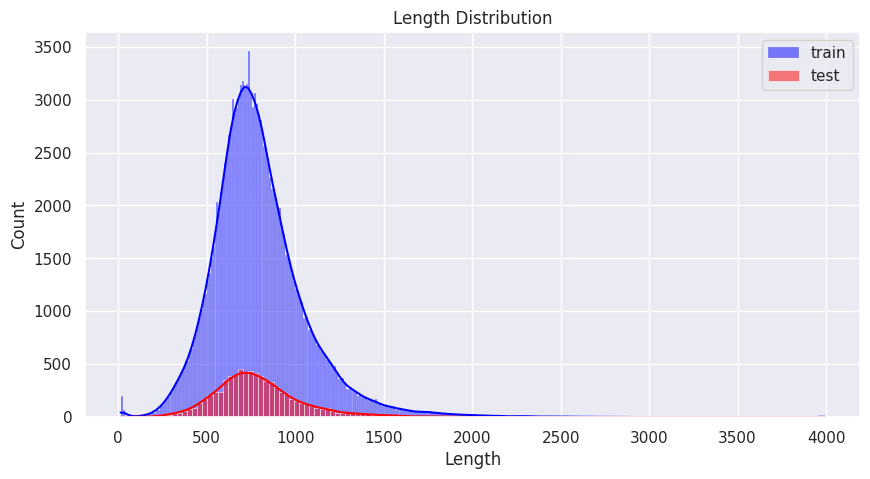

In [4]:
all_train_lengths = [x['length'] for x in ds['train']]
all_test_lengths = [x['length'] for x in ds['test']]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 5))
sns.histplot(all_train_lengths, color='blue', label='train', kde=True)
sns.histplot(all_test_lengths, color='red', label='test', kde=True)
plt.title('Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

In [5]:
print('Stats')
print('Train')
print('  Min:', min(all_train_lengths))
print('  Max:', max(all_train_lengths))
print('  Mean:', sum(all_train_lengths) / len(all_train_lengths))
print('  Median:', sorted(all_train_lengths)[len(all_train_lengths) // 2])

print('Test')
print('  Min:', min(all_test_lengths))
print('  Max:', max(all_test_lengths))
print('  Mean:', sum(all_test_lengths) / len(all_test_lengths))
print('  Median:', sorted(all_test_lengths)[len(all_test_lengths) // 2])


Stats
Train
  Min: 13
  Max: 3995
  Mean: 798.88076171875
  Median: 760
Test
  Min: 14
  Max: 3989
  Mean: 801.9708454810495
  Median: 759
